## Support Vector Machine Examples

### A linearly separable dataset - Iris Setosa Flower Versus Iris Versicolor Flower

In [61]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [62]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris["data"][:, (2,3)]
y_iris = iris["target"]

setosa_or_versicolor = (y_iris == 0) | (y_iris == 1)
X_iris = X_iris[setosa_or_versicolor]
y_iris = y_iris[setosa_or_versicolor]

In [63]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# add pipeline to first standardize data

linearSVC_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(loss="hinge", random_state=11))
])

linearSVC_pipeline.fit(X_iris, y_iris)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=11, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [64]:
print(linearSVC_pipeline["scaler"].scale_)
print(linearSVC_pipeline["scaler"].mean_)

[1.44228257 0.56232019]
[2.861 0.786]


In [65]:
print(linearSVC_pipeline["svm"].coef_)
print(linearSVC_pipeline["svm"].intercept_)
print(linearSVC_pipeline["svm"].classes_)

w_LinearSVC = linearSVC_pipeline["svm"].coef_[0]
b_LinearSVC = linearSVC_pipeline["svm"].intercept_[0]
print(w_LinearSVC)
print(b_LinearSVC)

# w[0] * x0 + w[1] * x1 + b = 0
# x1 = (-b - w[0] * x[0]) / w[1]

[[1.0607458  1.00177835]]
[0.29588877]
[0 1]
[1.0607458  1.00177835]
0.2958887668023069


In [66]:
from sklearn.metrics import accuracy_score

linearSVC_predictions = linearSVC_pipeline.predict(X_iris)
accuracy_score(y_iris, linearSVC_predictions)

1.0

In [67]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", random_state=11))
])

svc_pipeline.fit(X_iris, y_iris)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=11, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [68]:
w_SVC = svc_pipeline["svm"].coef_[0]
b_SVC = svc_pipeline["svm"].intercept_[0]

print(w_SVC)
print(b_SVC)

[1.04342638 0.94747825]
0.3218252105072825


In [69]:
from sklearn.linear_model import SGDClassifier

sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd_clf", SGDClassifier(random_state=11, max_iter=6000, learning_rate="constant", eta0=0.001)),
])
sgd_pipeline.fit(X_iris, y_iris)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd_clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.001,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='constant', loss='hinge',
                               max_iter=6000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=11,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [70]:
w_SGDC = sgd_pipeline["sgd_clf"].coef_[0]
b_SGDC = sgd_pipeline["sgd_clf"].intercept_[0]

print(w_SGDC)
print(b_SGDC)

[0.77858636 0.73064189]
0.11800000000000009


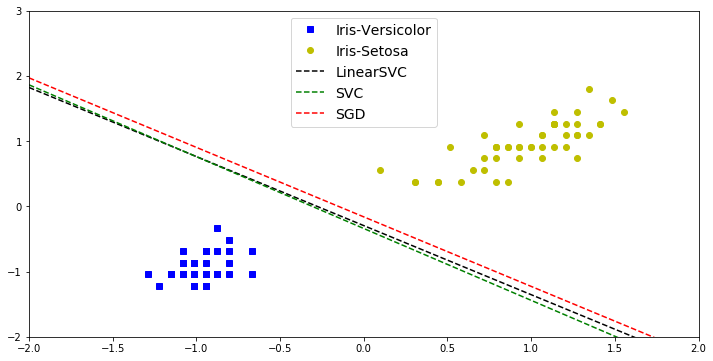

In [71]:
X_iris_scaled = (X_iris - linearSVC_pipeline["scaler"].mean_) / linearSVC_pipeline["scaler"].scale_
# print(X_iris_scaled)

x_grid = np.linspace(-2, 2, 100)
linearsvc_decision_boundary = (-b_LinearSVC - w_LinearSVC[0] * x_grid) / w_LinearSVC[1]
svc_decision_boundary = (-b_SVC - w_SVC[0] * x_grid) / w_SVC[1]
sgd_decision_boundary = (-b_SGDC - w_SGDC[0] * x_grid) / w_SGDC[1]

plt.figure(figsize=(12,6.0))
plt.subplot(111)
plt.axis([-2, 2, -2, 3.0])
plt.plot(X_iris_scaled[:, 0][y_iris == 0], X_iris_scaled[:, 1][y_iris == 0], 'bs', label = "Iris-Versicolor")
plt.plot(X_iris_scaled[:, 0][y_iris == 1], X_iris_scaled[:, 1][y_iris == 1], 'yo', label = "Iris-Setosa")
plt.plot(x_grid, linearsvc_decision_boundary, 'k--', label = "LinearSVC")
plt.plot(x_grid, svc_decision_boundary, 'g--', label="SVC")
plt.plot(x_grid, sgd_decision_boundary, 'r--', label="SGD")

plt.legend(loc="upper center", fontsize=14)
plt.show()

### SVM Classifier On MNIST Data Set

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

data = mnist["data"]
target = mnist["target"]
print(data[:5])